In [113]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Load the data 

In [114]:
# Read the “housing.csv” file from the folder into the program
housing = pd.read_excel('housing.xlsx')

In [115]:
# Print first few rows of this data.
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [116]:
# Extract input (X) and output (Y) data from the dataset.
# X= housing.drop(['median_house_value'],axis = 1)
# y = housing['median_house_value']

## 2. Handle missing values 
### Fill the missing values with the mean of the respective column.

In [117]:
#Checking Nan values 
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [118]:
# nan value found in total_bedrooms
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [119]:
# mean of total bedroom
housing['total_bedrooms'].mean()

537.8705525375618

In [120]:
# Fill the missing values with the mean of the respective column.
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean())
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [121]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [122]:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [123]:
#stats of the given data
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [124]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


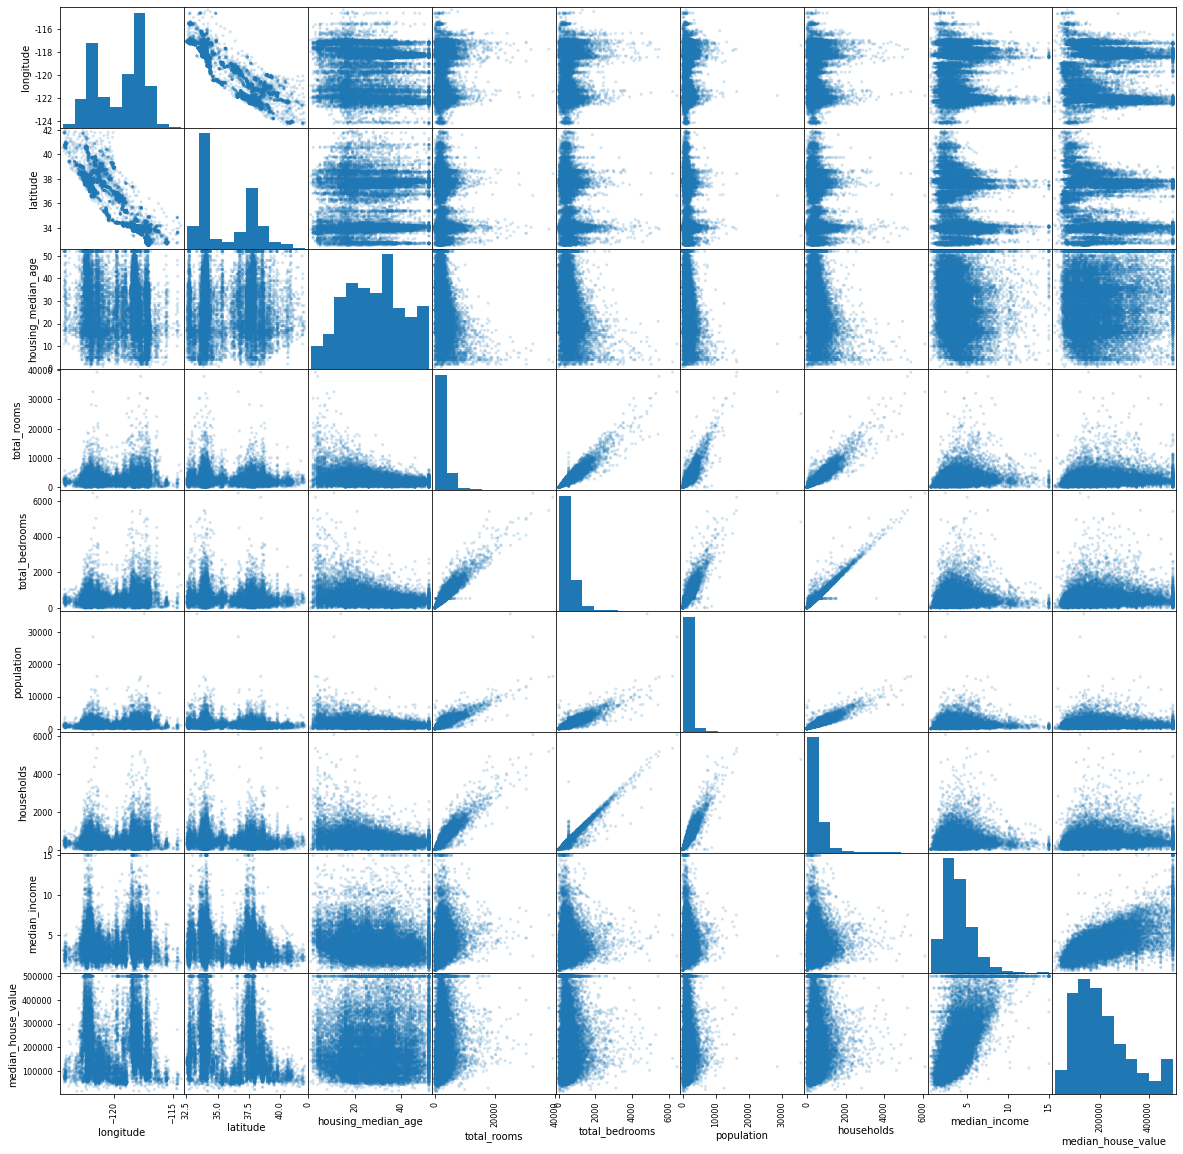

In [125]:

pd.plotting.scatter_matrix(housing,alpha = 0.2, figsize=(20,20),diagonal='hist');

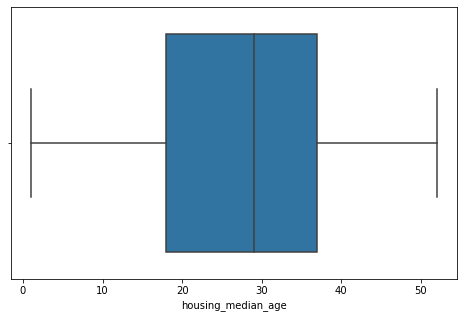

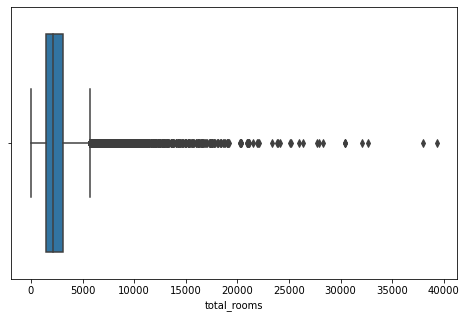

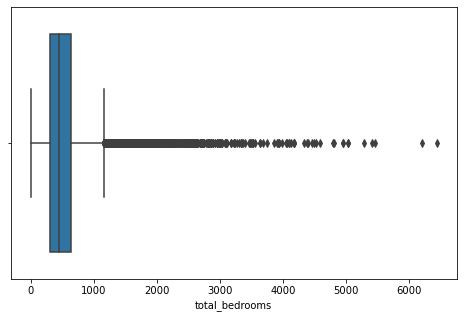

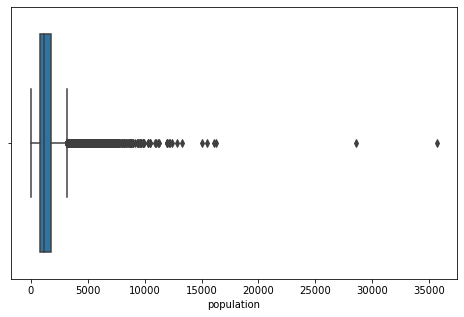

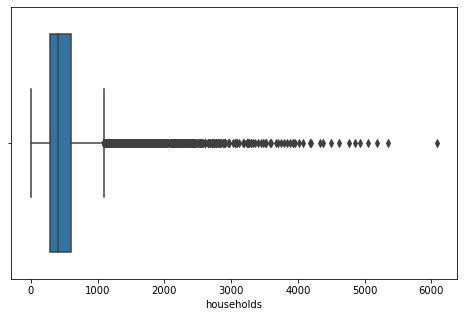

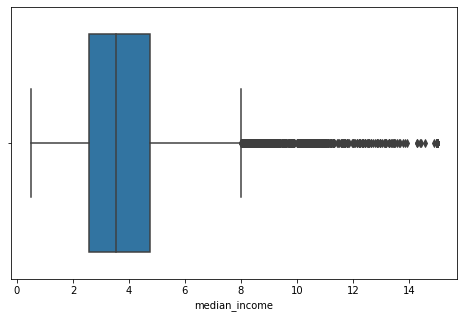

In [126]:
# Checking the outliers and treat the otliers
 # upper cap outlier - big values == q3+(1.5*IQR) < bigger outlier
# lower cap outliers - lower values == q1-(1.5*IQR) > lower outlier  
# IQR - Inter Quartile Range - Q3-Q1   (75%-25%)
def bplot(col_name,data):
    for column in col_name:
        plt.figure(figsize=(8,5))
        sns.boxplot(x = data[column])
        plt.show()
        
        q1 = data[column].quantile(0.25)
        q2 = data[column].quantile(0.5)
        q3 = data[column].quantile(0.75)
        
        iqr = q3-q1
        min_val = q1 - (1.5 * iqr)
        max_val = q3 + (1.5 * iqr)
        data[column] = np.where(data[column] < min_val, q2, data[column])
        data[column] = np.where(data[column] > max_val, q2, data[column])
    return data
housing = bplot(housing.drop(['longitude', 'latitude','ocean_proximity', 'median_house_value'], axis = 1).columns,housing)  


In [127]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

## 3. Encode categorical data :

In [128]:
#Convert categorical column in the dataset to numerical data.

housing = pd.get_dummies(housing, drop_first=False)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,3.5348,452600,0,0,0,1,0
1,-122.22,37.86,21.0,2127.0,1106.0,2401.0,409.0,3.5348,358500,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200,0,0,0,1,0


## 4. Split the dataset :  

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
# Extract input (X) and output (Y) data from the dataset.
X= housing.drop(['median_house_value'],axis = 1)
y = housing['median_house_value']

In [159]:
# Split the data into 80% training dataset and 20% test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 885767)

In [160]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12664,-121.45,38.49,34.0,3573.0,662.0,1540.0,620.0,3.5323,0,1,0,0,0
19587,-120.80,37.61,30.0,918.0,154.0,469.0,139.0,3.9688,0,1,0,0,0
17695,-121.83,37.29,10.0,1828.0,453.0,1356.0,409.0,4.5943,1,0,0,0,0
14888,-117.08,32.62,36.0,1674.0,309.0,818.0,307.0,3.4773,0,0,0,0,1
15513,-117.03,33.18,17.0,5391.0,886.0,2732.0,830.0,5.1771,1,0,0,0,0


In [161]:
y_train.head()

12664    109800
19587    175000
17695    123500
14888    150400
15513    212800
Name: median_house_value, dtype: int64

# 5. Standardize data :

In [162]:
# Standardize training and test datasets.

In [163]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mc = MinMaxScaler()
sc = StandardScaler()

In [164]:
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [165]:
# X_train[:2]

In [166]:
# X_test[:2]
# using StandardScaler values of range not between 0,1

In [167]:
X_train = mc.fit_transform(X_train)
X_test = mc.fit_transform(X_test)


In [168]:
X_train[:2]

array([[0.28884462, 0.63230606, 0.64705882, 0.6271097 , 0.56982759,
        0.49039693, 0.56736939, 0.40370637, 0.        , 1.        ,
        0.        , 0.        , 0.        ],
       [0.35358566, 0.53878852, 0.56862745, 0.16033755, 0.13189655,
        0.14756722, 0.12648946, 0.46181804, 0.        , 1.        ,
        0.        , 0.        , 0.        ]])

In [169]:
X_test[:2]

array([[0.26958291, 0.74493063, 0.43137255, 0.24353789, 0.27989601,
        0.20377479, 0.26330275, 0.13098901, 0.        , 1.        ,
        0.        , 0.        , 0.        ],
       [0.61648016, 0.14194237, 0.70588235, 0.32372077, 0.31542461,
        0.38515675, 0.32018349, 0.2640293 , 1.        , 0.        ,
        0.        , 0.        , 0.        ]])

# 6. Perform Linear Regression : 



In [170]:
#Perform Linear Regression on training data.
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


In [171]:
lm.fit(X_train,y_train)

LinearRegression()

In [172]:
lm.intercept_

339932.5210778663

In [173]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [174]:
lm.coef_

array([-314977.72348032, -287099.62884984,   42810.8681402 ,
         95983.42997061,   68150.86300245, -134741.36943015,
         -5101.86217921,  259113.42323355,  -14873.67527904,
        -64811.7900313 ,  107912.58480714,  -14763.43749951,
        -13463.68199729])

In [175]:
coef_df = pd.DataFrame(lm.coef_, index=X.columns)
coef_df.sort_values(0, ascending = False)

,0
median_income,259113.423234
ocean_proximity_ISLAND,107912.584807
total_rooms,95983.429971
total_bedrooms,68150.863002
housing_median_age,42810.868140
households,-5101.862179
ocean_proximity_NEAR OCEAN,-13463.681997
ocean_proximity_NEAR BAY,-14763.437500
ocean_proximity_<1H OCEAN,-14873.675279
ocean_proximity_INLAND,-64811.790031


In [176]:
#Predict output for test dataset using the fitted model.
y_pred = lm.predict(X_test)
y_pred[:5]

array([ 42397.78534135, 187800.90814782, 302607.42798351, 237280.19301055,
       142734.52137169])

In [177]:
y_test[:5]

1174      65200
7603     111000
846      236500
11365    201200
16559    119400
Name: median_house_value, dtype: int64

In [158]:
# Print root mean squared error (RMSE) from Linear Regression.
#             [ HINT: Import mean_squared_error from sklearn.metrics ]
from sklearn.metrics import mean_squared_error
print('RMSE value: ', np.sqrt(mean_squared_error(y_test,y_pred)).round(2))

RMSE value:  80353.83


# 7. Bonus exercise: Perform Linear Regression with one independent variable 

In [181]:
# Extract just the median_income column from the independent variables (from X_train and X_test).
lm.fit(X_train['median_income'],y_train)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [152]:
# Perform Linear Regression to predict housing values based on median_income.


In [153]:
# Predict output for test dataset using the fitted model.


In [154]:
# Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.